In [21]:
# 2)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm

In [12]:
x = np.array([
28, 23, 27, 33, 30, 33, 31, 36, 32, 41, 32, 30,
36, 34, 37, 37, 28, 23, 29, 41, 39, 33, 31, 31])
print(x)

[28 23 27 33 30 33 31 36 32 41 32 30 36 34 37 37 28 23 29 41 39 33 31 31]


In [13]:
x.std()

np.float64(4.730038465899499)

In [16]:
mu_hat= x.std()/np.sqrt(len(x))
print('Sample mean: ', x.mean())
print('CLT:', mu_hat)
pdx= pd.Series(x)
np.random.seed(123)
boot_means= np.zeros(2000)
for b in range(0, len(boot_means)):
    boot_sample= pdx.sample(len(pdx), replace=True)
    boot_means[b]= boot_sample.mean()
print('Bootstrap: ', boot_means.std())

Sample mean:  32.291666666666664
CLT: 0.9655150587658919
Bootstrap:  0.9621404809701793


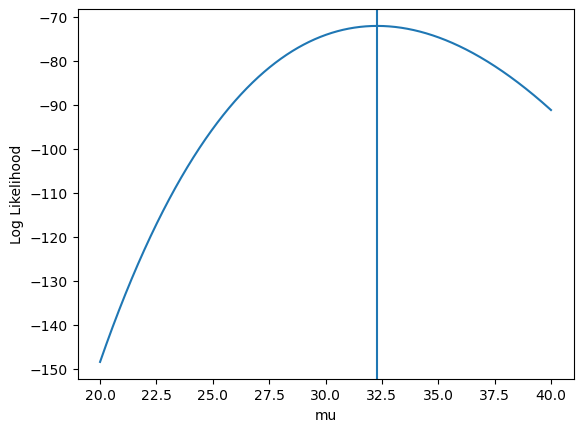

In [4]:
def likelihood(mu,x):
    return np.log(stats.poisson.pmf(x, mu=mu )).sum()
mu_values = np.linspace(20,40,2000)
logL = [likelihood(mu, x) for mu in mu_values]
plt.plot(mu_values, logL)
plt.axvline(x = x.mean())
plt.xlabel("mu")
plt.ylabel("Log Likelihood")
plt.show()

Text(0.5, 0, 'Profit')

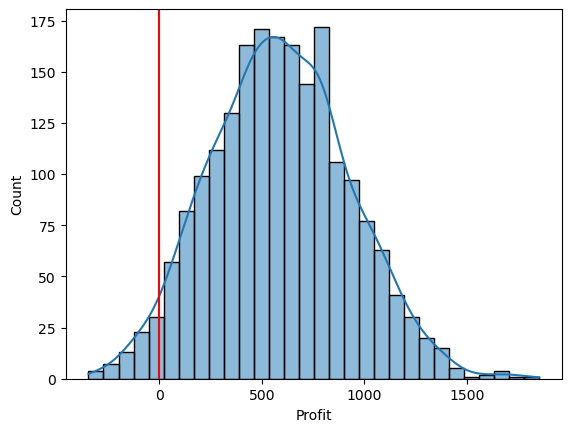

In [28]:
#4)
def run_mc(customer_arrival_rate=30, campaign=0, mc_runs =2000) :
    spending_rate = 1/50
    profit = np.zeros(mc_runs)
    # Set seed:
    np.random.seed(1234)
    # 20% margin on all sales
    margin = 0.2
    # Fixed costs for three weeks:
    fixed_costs = 290 * 18
    # Discount probabilities and values:
    discount_prob = np.array([0.15, .5, .2, 0.1,0.04, 0.01])
    discounts = np.array([1, 0.95, 0.9, 0.8,0.75, 0.0])
    for mc in range(0, mc_runs) :
        number_of_customers = stats.poisson.rvs(size = 18,
        mu = customer_arrival_rate)
        # Total number of customers over the 3 weeks:
        n = number_of_customers.sum()
        # Draw how much each customer spends:
        spending = stats.expon.rvs(size = n,
        scale = 1/spending_rate)
        # Spin the wheel for each customer:
        discount = np.random.choice(discounts, p=discount_prob,
        size = n, replace = True)
        # Profit = income (before discounts)*margin - discounts and fixed costs
        profit[mc] = spending.sum()*margin - campaign*discount.sum() - fixed_costs
    return profit
profit = run_mc(x.mean(), campaign = 0)
sns.histplot(profit, kde = True)
plt.axvline(x = 0, color = 'red')
plt.xlabel("Profit")

In [29]:
# expected profit
print(profit.mean())
# probability of profit without campaign 
print(np.mean(profit<0))


589.9777493195049
0.0355


Text(0.5, 0, 'Profit')

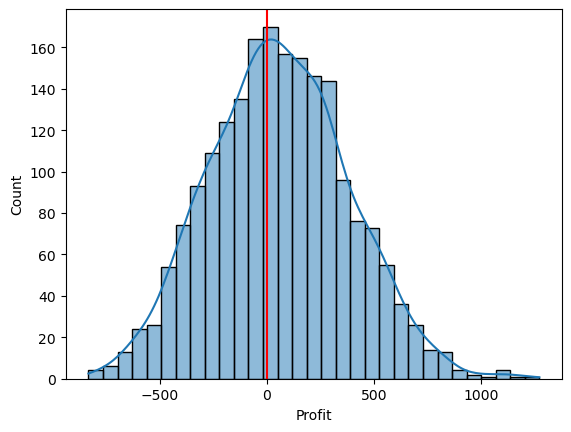

In [30]:
#4b)
#4)
def run_mc(customer_arrival_rate=30, campaign=0, mc_runs =2000) :
    spending_rate = 1/50
    profit = np.zeros(mc_runs)
    # Set seed:
    np.random.seed(1234)
    # 20% margin on all sales
    margin = 0.2
    # Fixed costs for three weeks:
    fixed_costs = 290 * 18
    # Discount probabilities and values:
    discount_prob = np.array([0.15, .5, .2, 0.1,0.04, 0.01])
    discounts = np.array([1, 0.95, 0.9, 0.8,0.75, 0.0])
    for mc in range(0, mc_runs) :
        number_of_customers = stats.poisson.rvs(size = 18,
        mu = customer_arrival_rate)
        # Total number of customers over the 3 weeks:
        n = number_of_customers.sum()
        # Draw how much each customer spends:
        spending = stats.expon.rvs(size = n,
        scale = 1/spending_rate)
        # Spin the wheel for each customer:
        discount = np.random.choice(discounts, p=discount_prob,
        size = n, replace = True)
        # Profit = income (before discounts)*margin - discounts and fixed costs
        profit[mc] = spending.sum()*margin - campaign*discount.sum() - fixed_costs
    return profit
profit = run_mc(x.mean(), campaign = 1)
sns.histplot(profit, kde = True)
plt.axvline(x = 0, color = 'red')
plt.xlabel("Profit")

In [31]:
# expected profit
print(profit.mean())
# probability of profit without campaign 
print(np.mean(profit<0))


58.152099319504984
0.4355


Text(0.5, 0, 'Profit')

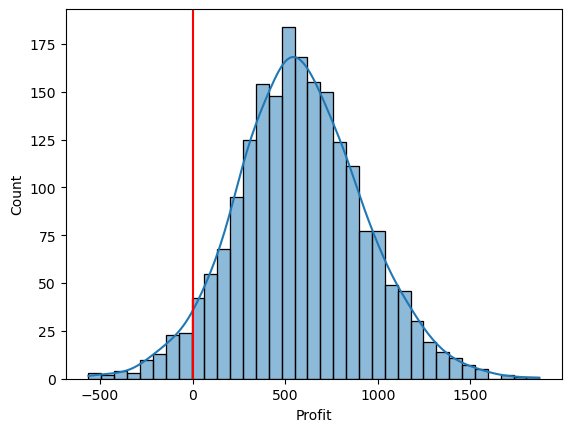

In [32]:
#increasing 10%
profit = run_mc(x.mean()*1.1, campaign = 1)
sns.histplot(profit, kde = True)
plt.axvline(x = 0, color = 'red')
plt.xlabel("Profit")

Text(0.5, 0, 'Profit')

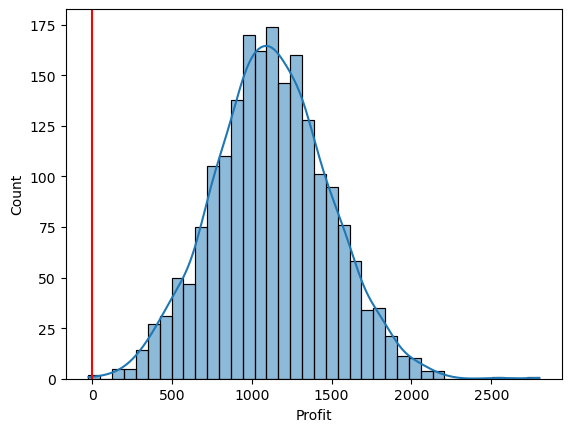

In [33]:
# increase 20%
profit = run_mc(x.mean()*1.2, campaign = 1)
sns.histplot(profit, kde = True)
plt.axvline(x = 0, color = 'red')
plt.xlabel("Profit")   